## 합성곱 신경망을 사용한 이미지 classification  
keras API를 사용해 CNN 모델을 만들어 패션 MNIST 이미지 classification 하기!

In [1]:
import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

e:\HongongML-DL_stduy\venv\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [2]:
model = keras.Sequential()
model.add(keras.layers.Input(shape=(28,28,1)))
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same'))

In [3]:
model.add(keras.layers.MaxPooling2D(2))
# (2,2) Pooling을 적용했으므로 feature map의 크기는 절반으로 줄어든다.
# 그리고 앞선 conv 층에서 filter의 개수를 32개롤 지정했기에 (14,14,32)가 된다.

In [4]:
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))
# 앞선 층에서의 또 절반이 되기에 (7,7)인데 여기서 filter의 개수를 64로 지정했기에 (7,7,64)가 된다.

In [5]:
model.add(keras.layers.Flatten()) # 입력을 Dense Network에 넣기 위해 flatten 해줌
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       313,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 333,526 (1.27 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

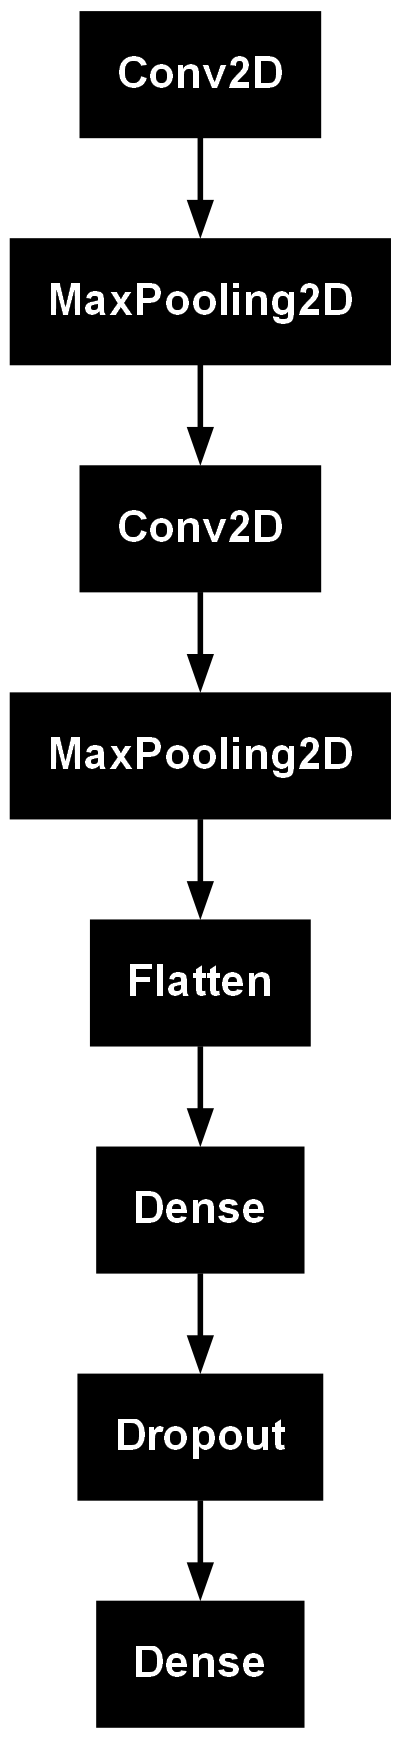

In [7]:
keras.utils.plot_model(model)

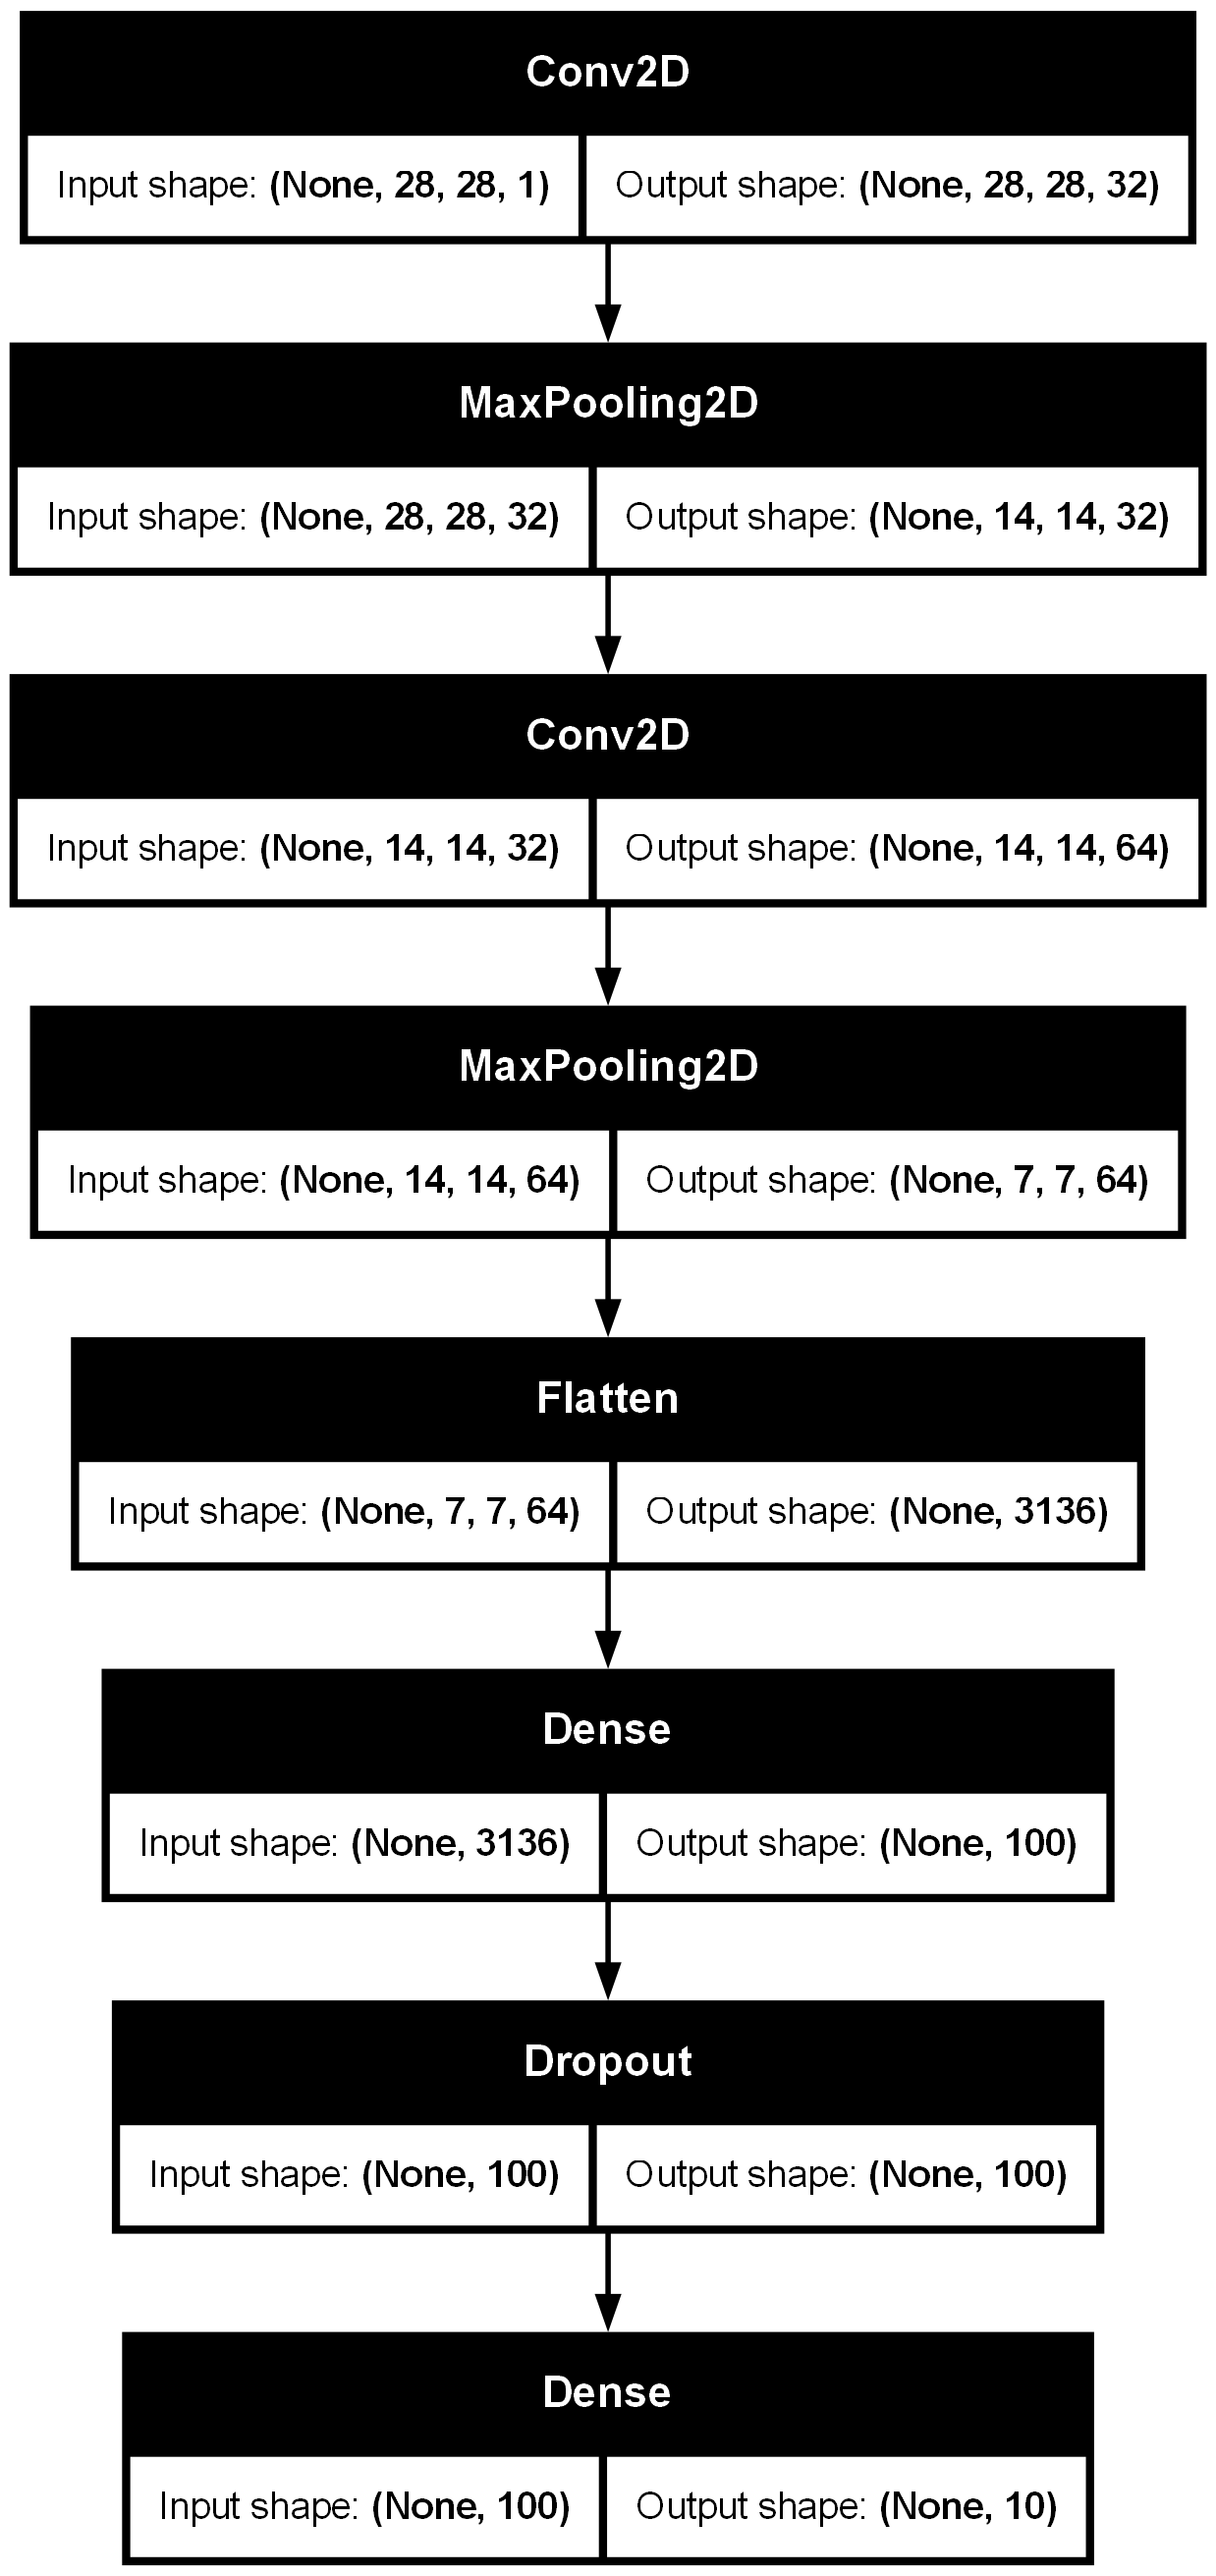

In [8]:
keras.utils.plot_model(model, show_shapes=True)

#### 모델 compile과 train  
keras API의 장점은 딥러닝 모델의 종류나 구성 방식에 상관없이 compile과 train 과정이 같다는 점이다.  
앞서 7장에서 사용했던 Fully Connected Network의 모델을 compile하고 훈련하는 코드와 거의 같다.  
Adam optimizer를 사용하고 ModelCheckpoint 콜백과 EarlyStopping 콜백을 함께 사용해서 조기 종료 기법을  
구현한다

In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.8138 - loss: 0.5227 - val_accuracy: 0.8746 - val_loss: 0.3445
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.8785 - loss: 0.3413 - val_accuracy: 0.9010 - val_loss: 0.2711
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.8959 - loss: 0.2922 - val_accuracy: 0.9024 - val_loss: 0.2584
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9053 - loss: 0.2618 - val_accuracy: 0.9030 - val_loss: 0.2596
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9145 - loss: 0.2377 - val_accuracy: 0.9142 - val_loss: 0.2375
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9204 - loss: 0.2178 - val_accuracy: 0.9168 - val_loss: 0.2238
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9260 - loss: 0.2012 - val_accuracy: 0.9132 - val_loss: 0.2326
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9329 -

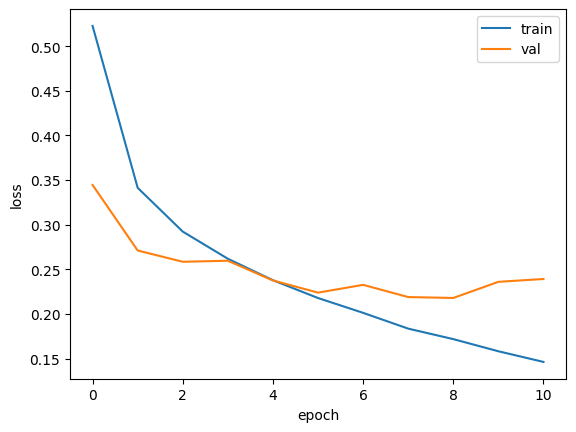

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [11]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9227 - loss: 0.2179


[0.21788062155246735, 0.9227499961853027]

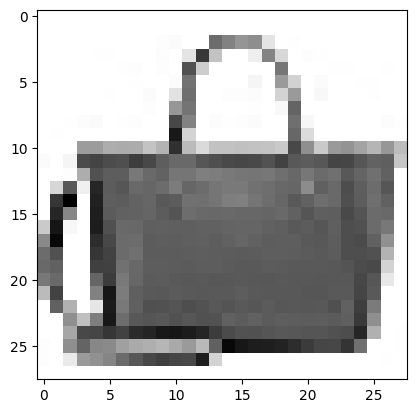

In [12]:
plt.imshow(val_scaled[0].reshape(28,28), cmap='gray_r')
plt.show()

In [13]:
preds = model.predict(val_scaled[0:1])
print(preds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
[[2.2875432e-19 3.5876850e-24 1.1387231e-19 5.2395420e-24 2.4630936e-20
  1.4155598e-18 4.1681990e-20 2.6487520e-19 1.0000000e+00 1.0974113e-20]]


왜 여기서 슬라이싱을 사용했냐?고 묻는다면, predict() 메서드에 데이터를 전달할 때 val_scaled[0]을 사용하지  
않고 val_scaled[0:1]와 같이 슬라이싱을 사용했다. keras의 fit(), predict(), evaluate() 메서드는 모두 입력의  
첫 번째 차원이 배치 차원일 것으로 기대함! 그래서 샘플 하나늘 전달할 때 (28,28,1)이 아니라 (1,28,28,1) 크기를  
전달해야 한다. 배열 슬라이싱은 인덱싱과 다르게 선택된 원소가 하나이더라도 전체 차원이 유지되어 (1,28,28,1) 크기를 만든다.

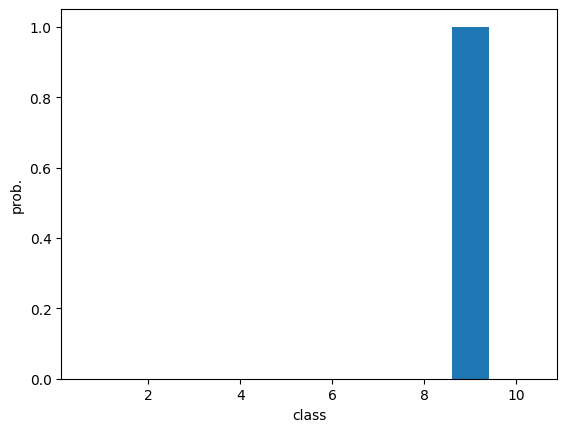

In [14]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [15]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [16]:
import numpy as np
print(classes[np.argmax(preds)])

가방


In [17]:
test_scaled = test_input.reshape(-1,28,28,1) /255.0

In [18]:
model.evaluate(test_scaled, test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9174 - loss: 0.2416


[0.24160417914390564, 0.9174000024795532]

In [19]:
from torchvision.datasets import FashionMNIST

fm_train = FashionMNIST(root='.', train=True, download=True)
fm_test = FashionMNIST(root='.', train=False, download=True)

train_input = fm_train.data
train_target = fm_train.targets
train_scaled = train_input.reshape(-1, 1, 28, 28) / 255.0

In [20]:
from sklearn.model_selection import train_test_split

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [21]:
import torch.nn as nn

model = nn.Sequential() # 모델 객체 생성
model.add_module('conv1', nn.Conv2d(1, 32, kernel_size=3, padding='same')) # 첫 번째 합성곱 신경망! 1은 입력 채널 수, 32는 출력 채널 수!
model.add_module('relu1', nn.ReLU()) # keras와 달리 conv 층에 같이 있는게 아니라 따로 ReLU 활성화 함수 적용
model.add_module('pool1', nn.MaxPool2d(2)) # 풀링층 (2,2) 풀링 적용

In [22]:
model.add_module('conv2', nn.Conv2d(32, 64, kernel_size=3, padding='same')) # 32는 입력 채널 수, 64는 출력 채널 수!
model.add_module('relu2', nn.ReLU())
model.add_module('pool2', nn.MaxPool2d(2))
model.add_module('flatten', nn.Flatten())

In [23]:
import torch
outputs = model(torch.ones(1,1,28,28))
print(outputs.shape)

torch.Size([1, 3136])


In [24]:
model.add_module('dense1', nn.Linear(3136, 100))
model.add_module('relu3', nn.ReLU())
model.add_module('dropout', nn.Dropout(0.3))
model.add_module('dense2', nn.Linear(100,10))

In [25]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

import torch.optim as optim

crietrion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

In [26]:
from torch.utils.data import TensorDataset, DataLoader

train_dataset = TensorDataset(train_scaled, train_target)
val_dataset = TensorDataset(val_scaled, val_target)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [27]:
train_hist = []
val_hist = []
patience = 2
best_loss = -1
early_stopping_counter = 0

epochs = 20
for epoch in range(epochs):
    model.train()
    train_loss = 0
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = crietrion(outputs, targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    model.eval()
    val_loss = 0
    with torch.no_grad():
        for inputs, targets in val_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = crietrion(outputs, targets)
            val_loss += loss.item()

    train_loss = train_loss / len(train_loader)
    val_loss = val_loss / len(val_loader)
    train_hist.append(train_loss)
    val_hist.append(val_loss)
    print(f"에포크: {epoch+1},", f"훈련 손실: {train_loss:.4f}, 검증 손실: {val_loss:.4f}")

    if best_loss == -1 or val_loss < best_loss:
        best_loss = val_loss
        early_stopping_counter = 0
        torch.save(model.state_dict(), 'best_cnn_model.pt')
    else:
        early_stopping_counter += 1
        if early_stopping_counter >= patience:
            print(f"{epoch+1}번째 에포크에서 조기 종료되었습니다.")
            break

에포크: 1, 훈련 손실: 0.5374, 검증 손실: 0.3535
에포크: 2, 훈련 손실: 0.3504, 검증 손실: 0.2927
에포크: 3, 훈련 손실: 0.2962, 검증 손실: 0.2631
에포크: 4, 훈련 손실: 0.2615, 검증 손실: 0.2480
에포크: 5, 훈련 손실: 0.2382, 검증 손실: 0.2322
에포크: 6, 훈련 손실: 0.2189, 검증 손실: 0.2265
에포크: 7, 훈련 손실: 0.2024, 검증 손실: 0.2231
에포크: 8, 훈련 손실: 0.1845, 검증 손실: 0.2237
에포크: 9, 훈련 손실: 0.1740, 검증 손실: 0.2271
9번째 에포크에서 조기 종료되었습니다.


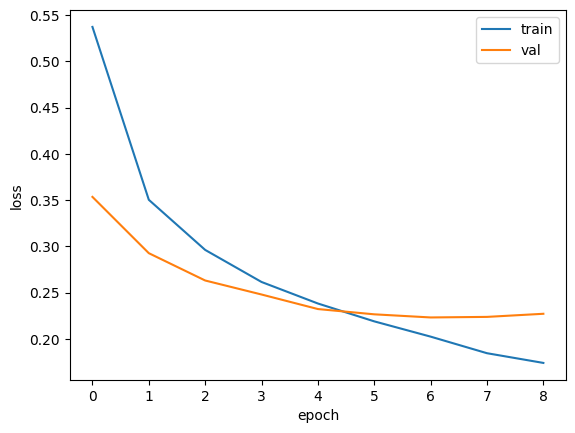

In [28]:
import matplotlib.pyplot as plt

plt.plot(train_hist, label='train')
plt.plot(val_hist, label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [29]:
model.load_state_dict(torch.load('best_cnn_model.pt', weights_only=True))

model.eval()
corrects = 0
with torch.no_grad():
    for inputs, targets in val_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        predicts = torch.argmax(outputs, 1)
        corrects += (predicts == targets).sum().item()
        
accuracy = corrects / len(val_dataset)
print(f"검증 정확도: {accuracy:.4f}")

검증 정확도: 0.9172


In [31]:
test_scaled = fm_test.data.reshape(-1, 1, 28,28) / 255.0
test_target = fm_test.targets

test_dataset = TensorDataset(test_scaled, test_target)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [34]:
model.eval()
corrects = 0
with torch.no_grad():
    for inputs, targets in test_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        predicts = torch.argmax(outputs, 1)
        corrects += (predicts == targets).sum().item()
        
accuracy = corrects / len(test_dataset)
print(f"테스트 정확도: {accuracy:.4f}")

테스트 정확도: 0.9122
